# Projet d'Approfondissements d'Optimisation

## Le transport optimal numérique

### Élèves : Guillaume Lambert, Leonardo Martins Bianco
### Enseignant: Luca Nenna

In [99]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

## 3 - Etude du problème par la programmation linéaire

### 3.3 - Applications

#### 3.3.1 - Résolution d'un exemple en 1D

Implémentation de 2 fonctions :

- c_objectif(C) transforme la matrice des coûts C en le vecteur-objectif $\textbf{c}$.

- solveOT(mu,nu,C) résout le problème linéaire primal $(\mathcal{P})$.

In [100]:
N = 20 #nombre de points

def c_objectif(C):
    '''vecteur objectif c'''
    c = C[0,:]
    for i in range(1,N):
        c = np.concatenate((c,C[i,:]))
    return c

def solveOT(mu,nu,C):
    '''résout le problème primal (P)'''
    N = np.size(mu)
     
    #Construction du vecteur objectif c
    c = c_objectif(C)
    
    #Construction de la matrice des contraintes (d'égalité) A
    A = np.zeros((2*N,N**2))
    un = np.ones(N)
    for i in range(0,N):
        A[i,i*N:i*N+N] = un
        for k in range(0,N):
            A[i+N,i+k*N] = 1
    
    #utilisation de l'algorithme du simplex
    return linprog(c,b_eq = np.concatenate((mu,nu)),A_eq = A,method='simplex').x



On implémente 3 fonctions mu_fun(x), nu_fun(x) et c_fun(x) qui calculent les composantes de $\mu$, $\nu$ et $\textbf{c}$. 

In [101]:
def mu_fun(x):
    '''Fonction de production'''
    if 0 <= x <= 1:
        return 1
    else:
        return 0
    
def nu_fun(y):
    '''Fonction de consommation'''
    return np.exp(-10*(y-0.5)**2)
    
def c_fun(x,y):
    '''Fonction des coûts'''
    return np.abs(x-y)**2

On construit les données du problème $(\mathcal{P})$ :

In [102]:
espace = np.linspace(0,1,N) #intervalle [0,1] discrétisé

#construction de mu et nu
mu = []
nu = []

for point in espace:
    mu.append(mu_fun(point))
    nu.append(nu_fun(point))
    
#normalisation de mu et nu
mu = np.array(mu)*(1/np.sum(mu))
nu = np.array(nu)*(1/np.sum(nu))

#construction de la matrice C
C = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        C[i,j] = c_fun(espace[i],espace[j])

On affiche ensuite le maillage uniforme et les fonctions de production et de consommation.

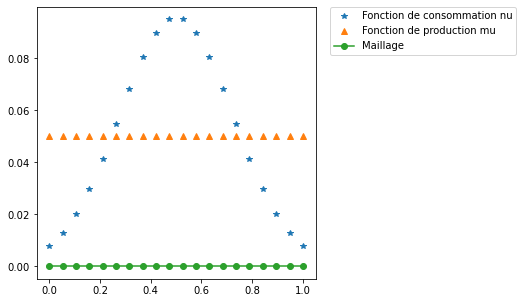

In [103]:
plt.figure(figsize=(5,5))
plt.plot(espace,nu,'*',label="Fonction de consommation nu")
plt.plot(espace,mu,'^',label="Fonction de production mu")
plt.plot(espace,np.zeros(N),'o-',label='Maillage')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

Résolution du problème primal $(\mathcal{P})$ :

In [104]:
gamma = solveOT(mu,nu,C)

On représente chaque ligne du couplage optimal $\gamma^\star$ puis représentation de $\gamma^\star$ grâce à matshow :

Text(0.5, 1.0, 'Représentation des lignes de gamma')

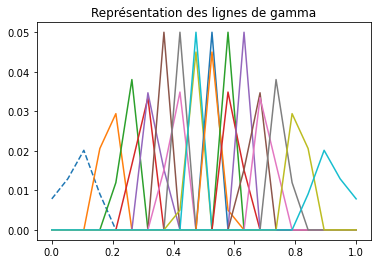

In [105]:
plt.figure()
plt.plot(espace,gamma[0:N],'--')
for k in range(1,N):
    plt.plot(espace,gamma[0+N*k:N+N*k]) #affichage d'une ligne de gamma
plt.title('Représentation des lignes de gamma')

Text(0.5, 1.12, 'Matrice gamma')

<Figure size 432x288 with 0 Axes>

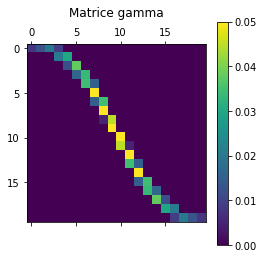

In [106]:
#transformation de gamma (vecteur) en gamma (matrice)
gamma_m = np.zeros((N,N))

for i in range(0,N):
    gamma_m[i,:] = gamma[i*N:i*N+N]

#représentation de la matrice
plt.figure()
plt.matshow(gamma_m)
plt.colorbar()
plt.title('Matrice gamma', y=1.12)

Vérification des contraintes $\sum_{j=1}^{N} \gamma_{ij}^\star = \mu_i ~~~~ \forall i \in I \text{ et }  \sum_{i=1}^{N} \gamma_{ij}^\star = \nu_j ~~~~ \forall j \in J$

La première contrainte est sur les lignes de $\gamma_{ij}^\star$. On doit obtenir $\sum_{j=1}^{N} \gamma_{ij}^\star = \mu_i = 1/N = 0.05 ~~ \forall i \in I$ :

In [107]:
for i in range(0,N):
    print(np.sum(gamma_m[i,:]))

0.050000000000000114
0.05000000000000001
0.04999999999999999
0.049999999999999996
0.049999999999999996
0.04999999999999999
0.04999999999999998
0.05
0.05000000000000001
0.05000000000000002
0.05000000000000001
0.050000000000000024
0.05
0.05
0.05000000000000001
0.05
0.049999999999999996
0.05
0.049999999999999996
0.05


On considère ces valeurs comme égales aux $\mu_i = 1/N = 0.05$ et la contrainte sur les lignes de $\gamma^\star$ est vérifiée. 

La seconde contrainte porte sur les colonnes de $\gamma^\star$. On affiche les erreurs entre $\sum_{i=1}^{N} \gamma_{ij}^\star$ et $\nu_j ~~ \forall j \in J$ :

In [108]:
for i in range(0,N):
    print(np.sum(gamma_m[:,i])-nu[i])

0.0
0.0
0.0
0.0
6.938893903907228e-18
5.551115123125783e-17
4.163336342344337e-17
-1.3877787807814457e-17
-1.3877787807814457e-17
-4.163336342344337e-17
-5.551115123125783e-17
0.0
0.0
1.3877787807814457e-17
0.0
0.0
0.0
0.0
0.0
0.0


On considère ces valeurs comme nulles et la contrainte sur les colonnes de $\gamma^\star$ est vérifiée.

La dernière contrainte porte sur le positivité des coefficients de $\gamma^\star$ :

In [109]:
print(any(gamma<0))

False


Aucune valeur de $\gamma^\star$ est négative et cette dernière contrainte est donc vérifiée.

On calcule la valeur de la fonction-objectif lorsque $\gamma^\star$ est le couplage optimal :

In [110]:
print(np.dot(c_objectif(C),gamma))

0.011112315676793683


On cherche maintenant à résoudre le problème dual $(\mathcal{MK}_d)$.

On implémente la fonction solveOTdual(mu,nu,C) qui le résout.

$\max z(x) = - \min (-z(x))$ donc on cherche à calculer $\min (-z(x))$ avec cette fonction.

In [111]:
def solveOTdual(mu,nu,C):
    '''résout le problème dual (MK_d)'''
    N = np.size(mu)
    
    #Consctruction du vecteur objectif c
    c = C[0,:]
    for i in range(1,N):
        c = np.concatenate((c,C[i,:]))
    
    #Consctruction de la matrice de contraintes (d'égalité) A
    A = np.zeros((2*N,N**2))
    un = np.ones(N)
    for i in range(0,N):
        A[i,i*N:i*N+N] = un
        for k in range(0,N):
            A[i+N,i+k*N] = 1
        
    bounds_tab = [(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None),(None,None)]
    
    #résolution avec l'algorithme du simplex
    lp = linprog(-np.concatenate((mu,nu)),bounds = bounds_tab, b_ub = c,A_ub = np.transpose(A),method='simplex')
    
    return lp.x, lp.slack

Résolution du problème dual $(\mathcal{MK}_d)$ et représentation des potentiels de Kantorovich calculés :

In [112]:
y, s = solveOTdual(mu,nu,C)

Text(0.5, 1.0, 'Potentiels de Kantorovich calculés par le simplex')

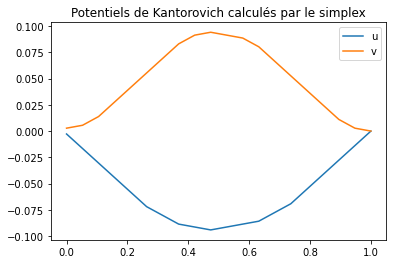

In [113]:
#représentation des potentiels u et v
plt.figure()
u = y[0:N]
v = y[N:2*N]
plt.plot(espace,u)
plt.plot(espace,v)
plt.legend(['u','v'])
plt.title("Potentiels de Kantorovich calculés par le simplex")

On veut maintenant valider et vérifier nos résultats et notre code.

Tout d'abord, on fait une vérification sur les variables d'écart : $x_i^\star s_i = 0$ où $x^\star$ est la solution optimale du problème primal $(\mathcal{P})$ et $s$ la variable d'écart du problème dual $(\mathcal{MK}_d)$. C'est la condition de complémentarité issue de la condition d'optimalité KKT.

In [114]:
for i in range(0,N):
    print(gamma[i]*s[i])

0.0
-3.969282809707819e-18
-9.012464599407037e-18
-5.641476346482242e-18
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


La vérification que l'on doit illustrer est $x_i^\star s_i = 0$. Si on considère les 3 valeurs en $10^{-18}$ comme nulles, alors la vérification est acquise.

Ensuite, on vérifie les contraintes du problème dual $(\mathcal{MK}_d)$ : $u_i + v_j \leq C_{ij} ~ \forall(i,j) \in I \times J$.

On affiche les différences $u_i + v_j - C_{ij}$ pour les couples $(i,j)$ où les contraintes ne semblent pas respectées (ie $u_i + v_j - C_{ij} > 0$) : 

In [115]:
for i in range(0,N):
    for j in range(0,N):
        if u[i]+v[j] > C[i,j]:
            print(u[i]+v[j] - C[i,j])

3.0704605524789486e-16
4.475586568020162e-16
6.210310043996969e-16
2.8796409701215e-16
1.0755285551056204e-16
2.636779683484747e-16
7.979727989493313e-16
7.147060721024445e-16
7.632783294297951e-16
5.967448757360216e-16
9.506284648352903e-16
4.926614671774132e-16
3.3480163086352377e-16
3.5388358909926865e-16
1.1275702593849246e-16
4.440892098500626e-16
1.4051260155412137e-16
3.885780586188048e-16
7.511352650979575e-16
5.412337245047638e-16
2.454633718507182e-16
3.7470027081099033e-16
2.0816681711721685e-17
3.2959746043559335e-17


On a donc des couples où les contraintes ne sont a priori pas respectées. Cependant, les différences trouvées sont en $10^{-16}$ donc on peut considérer que ces contraintes sont en fait vérifiées.

Finalement, les contraintes du problème dual $(\mathcal{MK}_d)$ sont bien respectées.

On calcule la valeur de la fonction-objectif quand $u$ et $v$ sont les potentiels de Kantorovich :

In [116]:
print(-np.dot(-np.concatenate((mu,nu)),y))

0.011112315676793912


Comparons $\langle \textbf{c}, \textbf{x}^\star \rangle$ et $\langle \textbf{b}, \textbf{y}^\star \rangle$ où $\textbf{x}^\star$ est la solution optimale de $(\mathcal{MK})$ et $\textbf{y}^\star$ est la solution optimale de $(\mathcal{MK}_d)$.

In [117]:
print(-np.dot(-np.concatenate((mu,nu)),y) - np.dot(c_objectif(C),gamma))

2.2898349882893854e-16


L'erreur étant en $10^{-16}$, on la considère comme nulle.

On peut donc considérer que l'on a égalité entre la valeur de la fonction-objectif du problème primal en $\textbf{x}^\star$ et celle du problème dual en $\textbf{y}^\star$. C'est le résultat de la dualité forte en programmation linéaire.

#### 3.3.2 - Résolution par une permutation optimale d'un exemple en 1D puis un second en 2D

Création des données du problème en 1D. 

In [118]:
N = 20 #nombre de points dans l'espace

#construction des emplacements des boulangeries (x) et des cafés (y)
#calculés selon la loi uniforme continue sur [0,1]
espace_x = np.random.rand(N,1)
espace_y = np.random.rand(N,1)
    
#construction des distributions mu et nu
mu = (1/N)*np.ones(N)
nu = (1/N)*np.ones(N)

#construction de la matrice des coûts C
C = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        C[i,j] = c_fun(espace_x[i],espace_y[j])

Représentation des emplacements des boulangeries et des cafés avec les fonctions de production et de consommation associées :

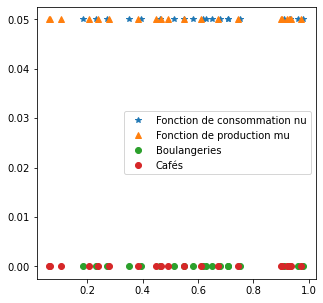

In [119]:
#représentation de nu_fun et mu_fun
#et l'emplacement des boulangeries et des cafés
plt.figure(figsize=(5,5))
plt.plot(espace_x,nu,'*')
plt.plot(espace_y,mu,'^')
plt.plot(espace_x,np.zeros(N),'o')
plt.plot(espace_y,np.zeros(N),'o')
plt.legend(["Fonction de consommation nu","Fonction de production mu",'Boulangeries','Cafés'],loc=5)

Résolution du problème et représentation de la matrice gamma par matshow :

In [120]:
gamma = solveOT(mu,nu,C)

<ipython-input-100-99582525704a>:26: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  return linprog(c,b_eq = np.concatenate((mu,nu)),A_eq = A,method='simplex').x


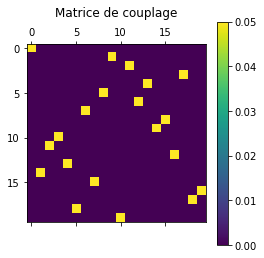

In [121]:
#transformation de gamma (vecteur) en gamma (matrice)
gamma_m = np.zeros((N,N))

for i in range(0,N):
    gamma_m[i,:] = gamma[i*N:i*N+N]

#représentation de la matrice gamma_m
plt.matshow(gamma_m)
plt.title("Matrice de couplage", y = 1.12)
plt.colorbar()

Le couplage optimal est une permutation. On représente donc les couples en les reliant. Pour que le graphique soit lisible, on représente chaque couple sur une ligne différente.

Text(0.5, 1.0, 'Représentation de la permutation optimale')

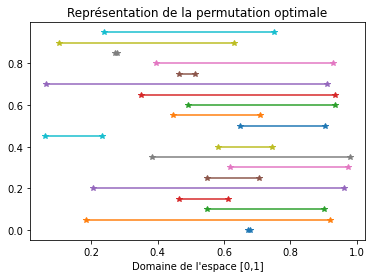

In [122]:
#on chercher le j associé au i
j_tab = []

for i in range(0,N):
    for j in range(0,N):
        if gamma_m[i,j] != 0:
            j_tab.append(j)

#on relie les points
for i in range(0,N):
    plt.plot([espace_x[i],espace_y[i]],[0+i/N,0+i/N],'*-')
plt.xlabel("Domaine de l'espace [0,1]")
plt.title("Représentation de la permutation optimale")

Création des données du problème en 2D.

In [123]:
#Nouvelle fonction-coût dans le cas R^2
def c_fun(x,y):
    return np.abs(x[0]**2-y[0]**2)**2 + np.abs(x[1]**2-y[1]**2)**2

In [124]:
N = 20 #nombre de points

#Construction des emplacements des boulangeries et des cafés :
#   - les composantes des emplacements des boulangeries sont distribuées selon la loi
#     uniforme dans l'intervalle [0,1]
#   - les composantes des emplacements des cafés sont distribuées selon la loi normale 
#     centrée réduite dans R
espace_x = np.random.rand(N,2)
espace_y = np.random.randn(N,2)

#Construction des distributions uniformes mu et nu égales à 1/N
mu = (1/N)*np.ones(N)
nu = (1/N)*np.ones(N)

#construction de la matrice C
C = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        C[i,j] = c_fun(espace_x[i],espace_y[j])

On représente les emplacements des boulangeries et des cafés :

Text(0.5, 1.0, 'Représentation des emplacements des boulangeries et des cafés')

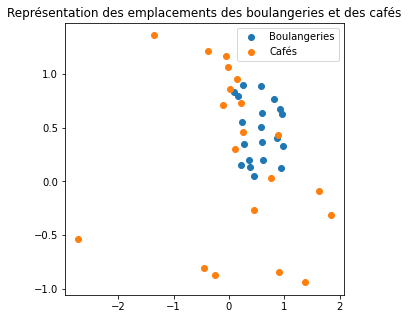

In [125]:
#représentation de l'emplacement des boulangeries et des cafés
plt.figure(figsize=(5,5))
plt.plot(espace_x[:,0],espace_x[:,1],'o')
plt.plot(espace_y[:,0],espace_y[:,1],'o')

plt.legend(['Boulangeries','Cafés'],loc=0)
plt.title("Représentation des emplacements des boulangeries et des cafés")

Résolution du problème et représentation de la matrice gamma par matshow :

In [126]:
gamma = solveOT(mu,nu,C)

<ipython-input-100-99582525704a>:26: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  return linprog(c,b_eq = np.concatenate((mu,nu)),A_eq = A,method='simplex').x


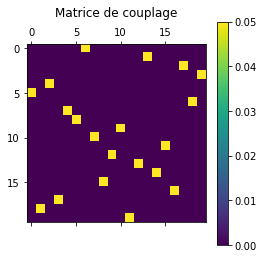

In [127]:
#transformation de gamma (vecteur) en gamma (matrice)
gamma_m = np.zeros((N,N))

for i in range(0,N):
    gamma_m[i,:] = gamma[i*N:i*N+N]

#représentation de gamma_m
plt.matshow(gamma_m)
plt.title("Matrice de couplage", y = 1.12)
plt.colorbar()

Représentation du couplage optimal : c'est une permutation. On représente donc les couples en les reliant. 

Text(0.5, 1.0, 'Représentation de la permutation optimale')

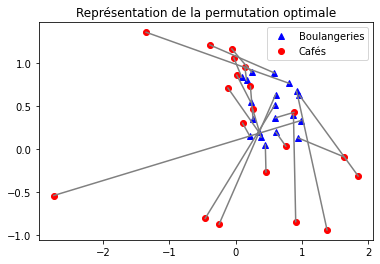

In [128]:
#représentation du couplage optimal gamma qui est une permutation,
#ainsi on trace une ligne entre la boulangerie et le café de chaque couple du couplage
plt.figure()
for k in range(0,N):
    plt.plot(espace_x[k][0],espace_x[k][1],'^',color='b')
    plt.plot(espace_y[k][0],espace_y[k][1],'o',color='r')
    
#on chercher le j associé au i
j_tab = []

for i in range(0,N):
    for j in range(0,N):
        if gamma_m[i,j] != 0:
            j_tab.append(j)

#on relie les points
for i in range(0,N):
    plt.plot([espace_x[i][0],espace_y[j_tab[i]][0]],[espace_x[i][1],espace_y[j_tab[i]][1]],'-',color='grey')
plt.legend(["Boulangeries","Cafés"])
plt.title("Représentation de la permutation optimale")

## 4 - La régularisation par la fonction log-sum-exp

### 4.3 - Mise en application sur l'exemple défini dans la partie 3.3.1

Le problème régularisé sans contrainte que l'on étudie est le suivant :

$$
\max \left\{\sum_{i} u_{i} \mu_{i}-\sum_{j} \varepsilon \log \left(\sum_{i=1}^{N} \exp \left(-\frac{C_{i j}-u_{i}}{\varepsilon}\right)\right) \nu_{j}\right\}
$$

Un calcul direct donne le gradient de la fonction-objectif :

$$
(\nabla \text{critère})_k = \mu_{k}- \sum_{j} \nu_{j} \frac{\exp \left(-\frac{\left(C_{kj}-u_{k}\right)}{\varepsilon}\right)}{\sum_{i=1}^{N} \exp \left(-\frac{C_{i j}-u_{i}}{\varepsilon}\right)}
$$

Création des données du problème :

In [129]:
def mu_fun(x):
    if 0 <= x <= 1:
        return 1
    else:
        return 0
    
def nu_fun(y):
    return np.exp(-10*(y-0.5)**2)
    
def c_fun(x,y):
    return np.abs(x-y)**2

In [130]:
N = 20 #nombre de points
espace = np.linspace(0,1,N) #intervalle [0,1] discrétisé

#construction de mu et nu
mu = []
nu = []

for point in espace:
    mu.append(mu_fun(point))
    nu.append(nu_fun(point))
    
#normalisation de mu et nu
mu = np.array(mu)*(1/np.sum(mu))
nu = np.array(nu)*(1/np.sum(nu))

#construction de la matrice C
C = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        C[i,j] = c_fun(espace[i],espace[j])

Voici l'implémentation Python de l'algorithme de gradient à pas fixe :

In [131]:
def GradDualReg(mu, nu, C, eps, t):
    '''algorithme de graident à pas fixe'''
    N = np.size(mu)
    u = np.zeros(N)
    v = np.zeros(N)
    grad = np.zeros(N)
    err = 10 # juste pour commencer la boucle
    tolerance = 0.0000001
    denom = np.zeros(N)
    
    compteur = 0 #compteur du nombre d'itérations
    
    while(err > tolerance):
        # Construction du denominateur
        for j in range(N):
            denom[j] = np.sum(np.exp(- (C[:, j] - u)/eps))
        
        # Construction du gradient
        for k in range(N):
            grad[k] = mu[k] - np.sum(np.divide(np.multiply(np.transpose(nu), np.exp(-(C[k, :] - u[k])/eps)),denom))

        err = np.linalg.norm(grad)
        u = u + t*grad
        
        compteur += 1
    
    # Après que la boucle s'arrête, on calcule v à partir de u trouvé
    for j in range(N):
        v[j] = np.amin(C[:, j] - u)
        
    #On peut décommenter cette ligne pour afficher le nombre d'itérations
    #print("Le nombre d'itérations est ", compteur)
    return u, v

On va maintenant calculer les potentiels de Kantorovich pour $\epsilon \in \{1, 0.5, 0.1, 0.05, 0.01, 0.005\}$ et les afficher.

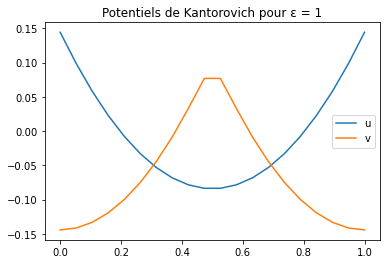

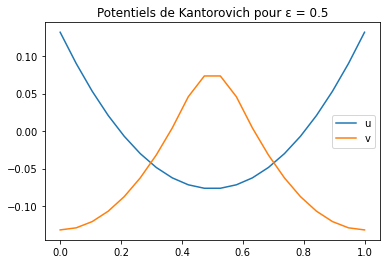

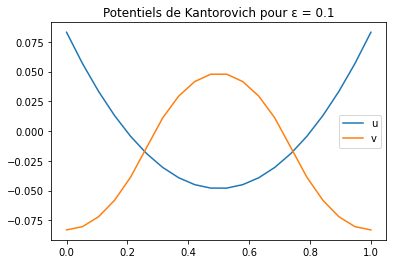

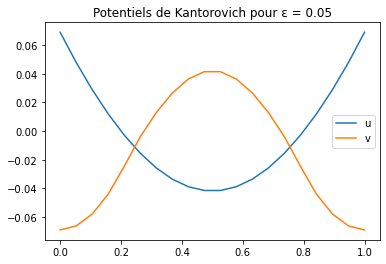

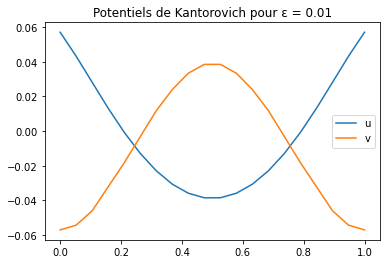

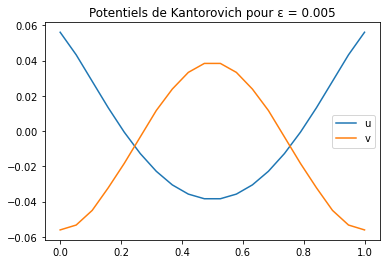

In [132]:
for epsilon in [1,0.5,0.1,0.05,0.01,0.005]:
    plt.figure()
    u, v = GradDualReg(mu, nu, C, epsilon, 0.01)
    plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
    plt.legend(["u","v"])
    plt.title("Potentiels de Kantorovich pour ε = {}".format(epsilon))

Comparons maintenant les potentiels de Kantorovich calculés par l'algorithme du simplex avec ceux calculés par l'algorithme de gradient avec $\epsilon$ petit ($\epsilon = 0.0003$).

Text(0.5, 1.0, 'Potentiels de Kantorovich du problème régularisé pour ε = 0.0003')

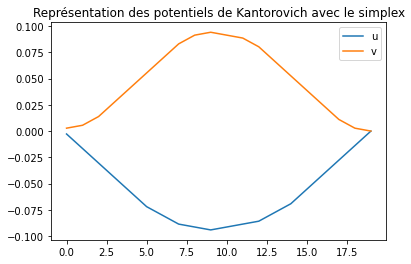

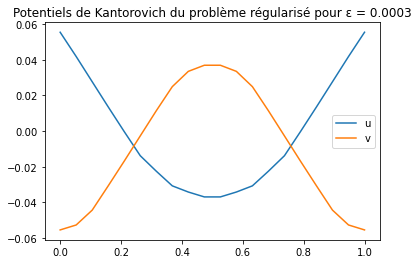

In [133]:
#potentiels de Kantorovich calculés avec l'algorithme de simplex
plt.figure()
y, s = solveOTdual(mu,nu,C)
u = y[0:N]
v = y[N:2*N]
plt.plot(u)
plt.plot(v)
plt.legend(['u','v'])
plt.title("Représentation des potentiels de Kantorovich avec le simplex")

#potentiels de Kantorovich calculés avec l'algorithme de gradient
epsilon = 0.0003
u, v = GradDualReg(mu, nu, C, epsilon, epsilon)
plt.figure()
plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
plt.legend(["u","v"])
plt.title("Potentiels de Kantorovich du problème régularisé pour ε = {}".format(epsilon))

On vérifie que l'on observe la relation : $\mu_i > \nu_i \Longrightarrow v_i > u_i$ pour les potentiels de Kantorovich calculés par l'algorithme de gradient. Dans un premier graphiquement puis dans un second, on le fait à la main :

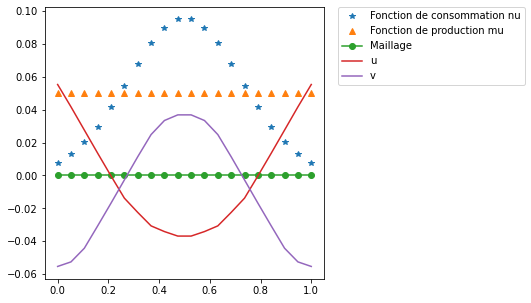

In [134]:
plt.figure(figsize=(5,5))
plt.plot(espace,nu,'*',label="Fonction de consommation nu")
plt.plot(espace,mu,'^',label="Fonction de production mu")
plt.plot(espace,np.zeros(N),'o-',label='Maillage')
plt.plot(espace,u,label="u")
plt.plot(espace,v,label="v")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [135]:
#les deux bolean doivent être égaux
for i in range(0,N):
    print(u[i] < v[i], " et ", mu[i] < nu[i])

False  et  False
False  et  False
False  et  False
False  et  False
False  et  False
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
False  et  False
False  et  False
False  et  False
False  et  False
False  et  False


On veut maintenant illustrer la convergence de

$$\max \left\{\sum_{i} u_{i} \mu_{i}-\sum_{j} \varepsilon \log \left(\sum_{i=1}^{N} \exp \left(-\frac{C_{i j}-u_{i}}{\varepsilon}\right)\right) \nu_{j} | ~ \textbf{u} \in \mathbb{R}^N \right\} ~~~~~~~~~~~~~ (\mathcal{MK}_\epsilon)$$

vers 

$$\max \left\{ \sum_{i = 1}^{N} \mu_i u_i + \sum_{j = 1}^{N} \nu_j (\min_i C_{ij} - u_i) ~ | ~ \textbf{u} \in \mathbb{R}^N  \right\} ~~~~~~~~~~~~~ (\mathcal{MK}_d)$$

On va donc calculer les valeurs des fonctions-objectif de $(\mathcal{MK}_\epsilon)$ en les potentiels de Kantorovich pour $\epsilon \in \{1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0003\}$  et observer la convergence de ces dernières vers le résultat trouvé précédemment avec le simplex :

In [136]:
def f_objectif_regularisee(x,eps):
    '''fonction-objectif du problème régularisé'''
    sum_j = 0
    for j in range(0,N):
        sum_i = 0
        for i in range(0,N):
            sum_i += np.exp((x[i]-C[i,j])/eps)
        sum_j += eps*np.log(sum_i)*nu[j]

    return np.dot(x,mu)-sum_j

In [137]:
print("epsilon :          ","Valeur de la fonction-objectif :")

for epsilon in [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0005,0.0003]:
    u, v = GradDualReg(mu, nu, C, epsilon, 0.01)
    print("{:<24.4f}".format(epsilon),"{}".format(f_objectif_regularisee(u,epsilon)))

epsilon :           Valeur de la fonction-objectif :
1.0000                   -2.867639163330509
0.5000                   -1.3774972796896876
0.1000                   -0.21944067973556636
0.0500                   -0.09035128403699619
0.0100                   -0.002312469012201748
0.0050                   0.005778293176521116
0.0010                   0.010417406173919617
0.0005                   0.0107712558893726
0.0003                   0.010907803468058867


D'autre part, on remarque que le nombre d'itérations nécessaires dans l'algorithme de gradient diminue lorsque $\epsilon$ tend vers 0. On explique cela par le fait que l'algorithme de gradient se comporte mieux avec le gradient de la fonction-objectif de $(\mathcal{MK}_\epsilon)$ lorsque $\epsilon$ tend vers 0. 

On compare les valeurs de la fonctions-objectif de $(\mathcal{MK}_d)$ avec les potentiels calculés par le simplex et ceux calculés par l'algorithme de gradient :

In [138]:
#potentiels de Kantorovich calculés avec l'algorithme de simplex
y, s = solveOTdual(mu,nu,C)
u1 = y[0:N]
v1 = y[N:2*N]

#potentiels de Kantorovich calculés avec l'algorithme de gradient
epsilon = 0.0003
u2, v2 = GradDualReg(mu, nu, C, epsilon, epsilon)

print("Valeur de la fonction-objectif de (MK_d) en les potentiels de Kantorovich calculés par")
print("- le simplex : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1))))
print("- l'algorithme de gradient : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))
print("Erreur : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1)))-np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))

Valeur de la fonction-objectif de (MK_d) en les potentiels de Kantorovich calculés par
- le simplex :  0.011112315676793912
- l'algorithme de gradient :  0.011053381018070867
Erreur :  5.893465872304493e-05


## 5 - La régularisation entropique

### 5.4 - Mise en application sur l'exemple défini dans la partie 3.3.1

On a trouvé le problème dual

$$
\sup _{u, v}\left\{\sum_{i} u_{i} \mu_{i}+\sum_{j} v_{j} \nu_{j}-\varepsilon \sum_{i j} \exp \left(\frac{u_{i}+v_{j}-c_{i j}}{\varepsilon}\right)\right\}
$$

qui est équivalent à

$$
- \inf_{u, v}\left\{-\sum_{i} u_{i} \mu_{i}-\sum_{j} v_{j} \nu_{j}+\varepsilon \sum_{i j} \exp \left(\frac{u_{i}+v_{j}-c_{i j}}{\varepsilon}\right)\right\}
$$

La fonction-objectif est une fonction différentiable.

On calcule le gradient du critère :

$$
\frac{\partial \, \text{critère}}{\partial u_{i}}= -\mu_{i}+ \sum_{j} \exp \left(\frac{u_{i}+v_{j}-c_{i j}}{\varepsilon}\right)=-\mu_{i}+ \sum_{j} a_{i} b_{j} \bar{\gamma}_{i j}
$$

$$
\frac{\partial \, \text{critère}}{\partial v_{j}}=-\nu_{j}+ \sum_{i} \exp \left(\frac{u_{i}+v_{j}-c_{i j}}{\varepsilon}\right)=-\nu_{j}+ \sum_{i} a_{i} b_{j} \bar{\gamma}_{i j}
$$

Et on remarque que $\gamma_{ij}^{\star} = a_i b_j \bar{\gamma}_{ij}$ avec les données de la dernière itération.

On implémente 3 fonctions mu_fun(x), nu_fun(x) et c_fun(x) qui calculent les composantes de $\mu$, $\nu$ et $\textbf{c}$. 

In [139]:
def mu_fun(x):
    if 0 <= x <= 1:
        return 1
    else:
        return 0
    
def nu_fun(y):
    return np.exp(-10*(y-0.5)**2)
    
def c_fun(x,y):
    return np.abs(x-y)**2

Construction des données du problème

In [140]:
N = 20 #nombre de points
espace = np.linspace(0,1,N) #intervalle [0,1] discrétisé

#construction de mu et nu
mu = []
nu = []

for point in espace:
    mu.append(mu_fun(point))
    nu.append(nu_fun(point))
    
#normalisation de mu et nu
mu = np.array(mu)*(1/np.sum(mu))
nu = np.array(nu)*(1/np.sum(nu))

#construction de la matrice C
C = np.ndarray((N,N))
for i in range(0,N):
    for j in range(0,N):
        C[i,j] = c_fun(espace[i],espace[j])

Implémentation de l'algorithme de gradient à pas fixe :

In [141]:
def EntDual(mu, nu, C, eps):
    N = np.size(mu)
    p = np.zeros(2*N)
    u = p[0:N]
    v = p[N: 2*N]
    grad = np.zeros(2 * N)
    
    t = 0.01 # Pas de l'algorithme de gradient.
    err = 10 # juste pour commencer la boucle
    gamma_bar = np.exp(-C/eps)
    tolerance = 10**(-10)
    nb_iter = 0
    
    while(err > tolerance):
        
        # Construction du gradient
        a = np.exp(u/eps) # vecteur
        b = np.exp(v/eps) # vecteur
        nb_iter += 1
        
        # Dérivées par rapport à u_i
        for k in range(N):
            grad[k] = - mu[k] + a[k] * np.dot(gamma_bar[k, :], b)
            
        # Dérivées par rapport à v_j
        for k in range(N, 2 * N):
            grad[k] = - nu[k - N] + b[k - N] * np.dot(np.transpose(gamma_bar[:, k - N]), a)
            
        err = np.linalg.norm(grad)
        p = p - t*grad
        u = p[0:N]
        v = p[N: 2*N]
        
    # Calculer gamma_star avec les a et b finaux
    gamma_star = np.zeros([N,N])
    for i in range(N):
        for j in range(N):
            gamma_star[i][j] = a[i] * b[j] * gamma_bar[i][j]
        
    #On peut décommenter cette ligne pour afficher le nombre d'itérations
    #print("Le nombre d'itérations est ", nb_iter, " pour epsilon = ",eps)    
    
    return u, v, gamma_star



On va reprendre les tests effectués pour le problème régularisé précédent. On recycle donc le code de la partie de la régularisation avec $log-sum-exp$.

On va maintenant calculer les potentiels de Kantorovich et le couplage associé pour $\epsilon \in \{1, 0.5, 0.1, 0.05, 0.01, 0.005\}$ et les afficher.

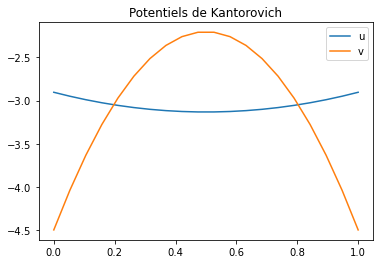

<Figure size 432x288 with 0 Axes>

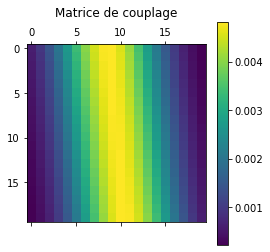

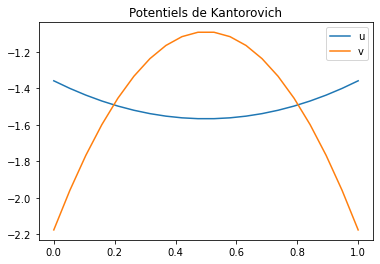

<Figure size 432x288 with 0 Axes>

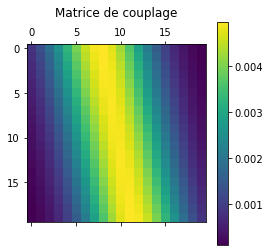

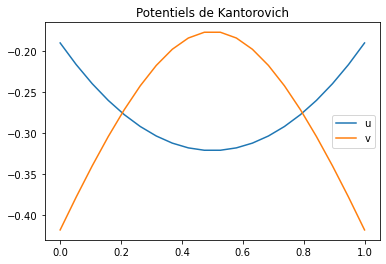

<Figure size 432x288 with 0 Axes>

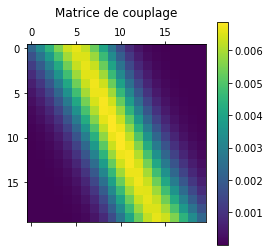

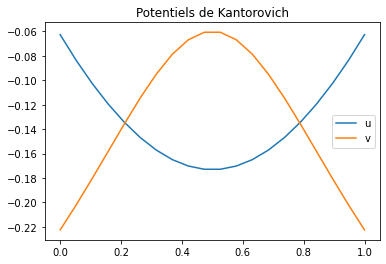

<Figure size 432x288 with 0 Axes>

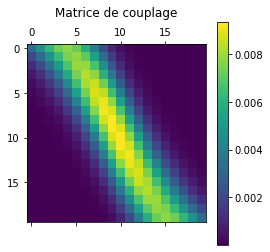

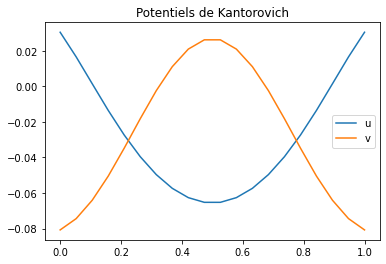

<Figure size 432x288 with 0 Axes>

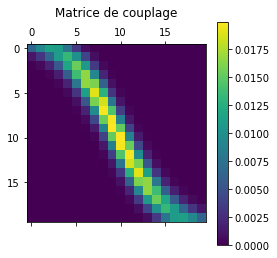

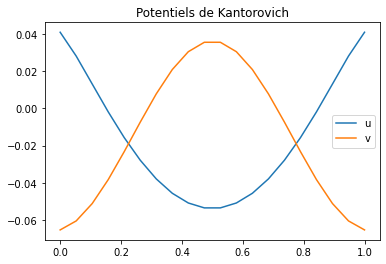

<Figure size 432x288 with 0 Axes>

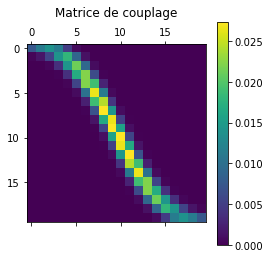

In [142]:
for epsilon in [1,0.5,0.1,0.05,0.01,0.005]:
    plt.figure()
    u, v, gamma_star = EntDual(mu, nu, C, epsilon)
    plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
    plt.legend(["u","v"])
    plt.title("Potentiels de Kantorovich")
    plt.figure()
    plt.matshow(gamma_star)
    plt.colorbar()
    plt.title("Matrice de couplage", y = 1.12)

Comparons maintenant les potentiels de Kantorovich calculés par l'algorithme du simplex avec ceux calculés par l'algorithme de gradient avec $\epsilon$ petit ($\epsilon = 0.0008$, la valeur la plus petite de $\varepsilon$ pour laquelle l'algorithme fonctionne).

Text(0.5, 1.0, 'Potentiels de Kantorovich du problème entropique régularisé pour epsilon = 0.0008')

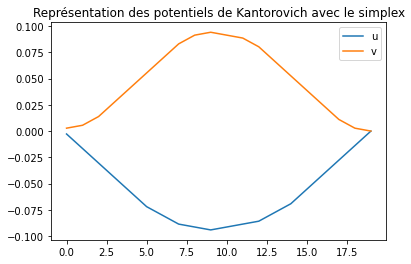

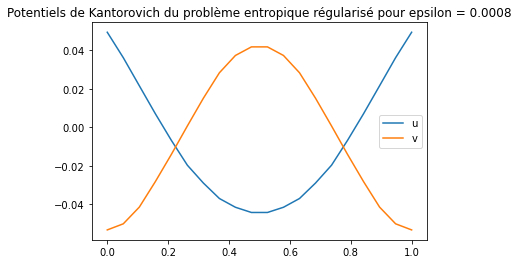

In [143]:
#potentiels de Kantorovich calculés avec l'algorithme de simplex
plt.figure()
y, s = solveOTdual(mu,nu,C)
u = y[0:N]
v = y[N:2*N]
plt.plot(u)
plt.plot(v)
plt.legend(['u','v'])
plt.title("Représentation des potentiels de Kantorovich avec le simplex")

#potentiels de Kantorovich calculés avec l'algorithme de gradient
epsilon = 0.0008
u, v, gamma_star = EntDual(mu, nu, C, epsilon)
plt.figure()
plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
plt.legend(["u","v"])
plt.title("Potentiels de Kantorovich du problème entropique régularisé pour epsilon = {}".format(epsilon))

Comparons maintenant le couplage calculé par l'algorithme du simplex avec celui calculé par l'algorithme de gradient (toujours avec $\varepsilon = 0.0008$).

<ipython-input-100-99582525704a>:26: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  return linprog(c,b_eq = np.concatenate((mu,nu)),A_eq = A,method='simplex').x


Text(0.5, 1.12, 'Erreur entre les deux couplages')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

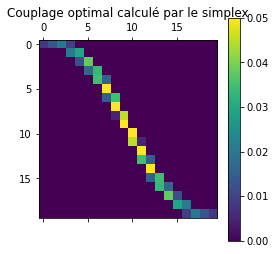

<Figure size 432x288 with 0 Axes>

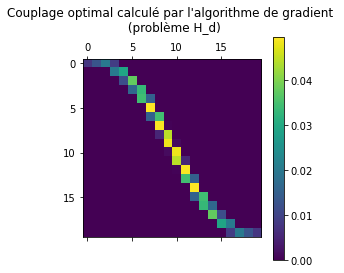

<Figure size 432x288 with 0 Axes>

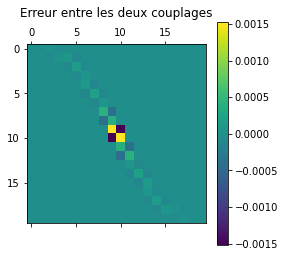

In [144]:
#couplage calculé avec l'algorithme de simplex
plt.figure()
gamma = solveOT(mu,nu,C)

#transformation de gamma (vecteur) en gamma (matrice)
gamma_m = np.zeros((N,N))

for i in range(0,N):
    gamma_m[i,:] = gamma[i*N:i*N+N]

#représentation de la matrice
plt.figure()
plt.matshow(gamma_m)
plt.colorbar()
plt.title('Couplage optimal calculé par le simplex')

#couplage calculé avec l'algorithme de gradient
epsilon = 0.0008
u, v, gamma_star = EntDual(mu, nu, C, epsilon)
plt.figure()
plt.matshow(gamma_star)
plt.colorbar()
plt.title("Couplage optimal calculé par l'algorithme de gradient \n (problème H_d)", y = 1.12)

plt.figure()
plt.matshow(gamma_m-gamma_star)
plt.colorbar()
plt.title("Erreur entre les deux couplages", y = 1.12)

On remarque la forme des potentiels de Kantorovich est similaire par rapport à celle des potentiels précédent. On reprend donc les mêmes vérifications sur leur "stratégie".

On vérifie que l'on observe la relation : $\mu_i > \nu_i \Longrightarrow v_i > u_i$ pour les potentiels de Kantorovich calculés par l'algorithme de gradient. Dans un premier graphiquement puis dans un second, on le fait à la main :

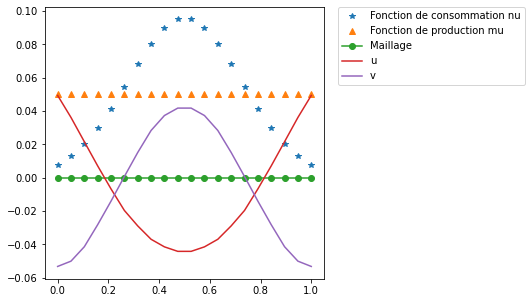

In [145]:
plt.figure(figsize=(5,5))
plt.plot(espace,nu,'*',label="Fonction de consommation nu")
plt.plot(espace,mu,'^',label="Fonction de production mu")
plt.plot(espace,np.zeros(N),'o-',label='Maillage')
plt.plot(espace,u,label="u")
plt.plot(espace,v,label="v")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [146]:
#les deux bolean doivent être égaux
for i in range(0,N):
    print(u[i] < v[i], " et ", mu[i] < nu[i])

False  et  False
False  et  False
False  et  False
False  et  False
False  et  False
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
False  et  False
False  et  False
False  et  False
False  et  False
False  et  False


On veut maintenant illustrer la convergence de

$$
\sup_{u, v} \left\{ \sum_{i} u_{i} \mu_{i}+\sum_{j} v_{j} \nu_{j}-\varepsilon \sum_{i j} \exp \left(\frac{u_{i}+v_{j}-C_{i j}}{\varepsilon}\right) \right\} ~~~~~~~~~~~~~ (\mathcal{H}_d)$$


vers 

$$\max \left\{ \sum_{i = 1}^{N} \mu_i u_i + \sum_{j = 1}^{N} \nu_j (\min_i C_{ij} - u_i) ~ | ~ \textbf{u} \in \mathbb{R}^N  \right\} ~~~~~~~~~~~~~ (\mathcal{MK}_d)$$

On va donc calculer les valeurs des fonctions-objectif de $(\mathcal{H}_d)$ en les potentiels de Kantorovich pour $\epsilon \in \{1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0008\}$ et observer la convergence de ces dernières :

In [147]:
def f_objectif_entropique_regularisee(u,v,eps):
    '''fonction-objectif du problème régularisé'''
    sum_j = 0
    for j in range(0,N):
        sum_i = 0
        for i in range(0,N):
            sum_i += np.exp((u[i]+v[j]-C[i,j])/eps)
        sum_j += sum_i

    return -np.dot(u,mu)-np.dot(v,nu)+eps*sum_j

In [148]:
print("epsilon :          ","Valeur de la fonction-objectif :")

for epsilon in [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0008]:
    u, v, gamma_star = EntDual(mu, nu, C, epsilon)
    print("{:<24.4f}".format(epsilon),"{}".format(-f_objectif_entropique_regularisee(u,v,epsilon)))

epsilon :           Valeur de la fonction-objectif :
1.0000                   -6.655086889298288
0.5000                   -3.2712211426735776
0.1000                   -0.5981854523323431
0.0500                   -0.2797236703353832
0.0100                   -0.04018694627187604
0.0050                   -0.013158945453314058
0.0010                   0.0066299584479551105
0.0008                   0.007533024634127209


D'autre part, on remarque que le nombre d'itérations nécessaires dans l'algorithme de gradient diminue lorsque $\epsilon$ tend vers 0. On explique cela par le fait que l'algorithme de gradient se comporte mieux avec le gradient de la fonction-objectif de $(\mathcal{H}_d)$ lorsque $\epsilon$ tend vers 0. 

On compare les valeurs de la fonctions-objectif de $(\mathcal{MK}_d)$ avec les potentiels calculés par le simplex et ceux calculés par l'algorithme de gradient pour les problèmes $(\mathcal{MK}_\varepsilon)$ et $(\mathcal{H}_d)$ :

In [149]:
#potentiels de Kantorovich calculés avec l'algorithme de simplex
y, s = solveOTdual(mu,nu,C)
u1 = y[0:N]
v1 = y[N:2*N]

#potentiels de Kantorovich calculés avec l'algorithme de gradient (H_d)
epsilon = 0.0008
u2, v2, gamma_star = EntDual(mu, nu, C, epsilon)

print("Valeur de la fonction-objectif de (MK_d) en les potentiels de Kantorovich calculés par")
print("- le simplex : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1))))
print("\n- l'algorithme de gradient pour (H_d) : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))
print("Erreur : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1)))-np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))

#potentiels de Kantorovich calculés avec l'algorithme de gradient
epsilon = 0.0003
u2, v2 = GradDualReg(mu, nu, C, epsilon, epsilon)

print("\n- l'algorithme de gradient pour (MK_epsilon) : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))
print("Erreur : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1)))-np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))

Valeur de la fonction-objectif de (MK_d) en les potentiels de Kantorovich calculés par
- le simplex :  0.011112315676793912

- l'algorithme de gradient pour (H_d) :  0.008333024634204668
Erreur :  0.0027792910425892443

- l'algorithme de gradient pour (MK_epsilon) :  0.011053381018070867
Erreur :  5.893465872304493e-05


On remarque que le résultat le moins bon, c'est-à-dire la valeur de la fonction la plus basse dans le problème de maximisation $(\mathcal{MK}_d)$, est celui du problème entropique régularisé $(\mathcal{H}_d)$ avec les potentiels calculés par l'algorithme de gradient. De plus, l'erreur par rapport au résultat du simplex est bien plus importante que celle du problème $(\mathcal{MK}_\varepsilon)$. La première est de l'ordre $10^{-3}$ et la seconde d'ordre $10^{-5}$.

De plus, on remarque que l'algorithme de gradient pour calculer $(\mathcal{H}_d)$ est instable pour des petites valeurs de $\varepsilon$. C'est pourquoi, on cherche un autre algorithme pour résoudre $(\mathcal{H}_d)$. Cet algorithme est celui de Sinkhorn qui se base sur les équations de Berntein-Schrödinger.

### 5.5 - L'algorithme de Sinkhorn

On reprend les mêmes tests sur $(\mathcal{H}_d)$ avec cette fois l'algorithme de Sinkhorn.

L'état initial est pour $a_i^0$ et $b_j^0$ tels que

$$
a_i^0 = \exp{\left( \frac{u_i^0}{\varepsilon} \right)}
$$

$$
b_j^0 = \exp{\left( \frac{v_j^0}{\varepsilon} \right)}
$$

où $u_0$ et $v_0$ sont zéro. On implémente l'algorithme de Sinkhorn :

In [150]:
def Sinkhorn(mu, nu, C, eps):
    '''algorithme de Sinkhorn pour le problème (H_d)'''
    N = np.size(mu)
    M = np.size(nu)
    u = np.zeros(N) # Point de départ
    v = np.zeros(M) # Point de départ
    err = 10 # juste pour commencer la boucle
    tolerance = 10**(-8)
    
    # a et b initials
    a = np.exp(u/eps)
    b = np.exp(v/eps)
    gamma_bar = np.exp(-C/eps) # matrice de coût
    iter = 0
    
    while(err > tolerance):
        denom_a = np.dot(gamma_bar, b)
        a_avant = a
        a = np.divide(mu, denom_a)
        denom_b = np.dot(np.transpose(gamma_bar), a)
        b_avant = b
        b = np.divide(nu, denom_b)
        err = np.linalg.norm(np.concatenate([a - a_avant, b - b_avant]))
        iter += 1
    
    #print(iter) POUR TESTS
    
    # Calculer gamma_star avec le a et b finals
    gamma_star = np.zeros([N,M])
    for i in range(N):
        for j in range(M):
            gamma_star[i][j] = a[i] * b[j] * gamma_bar[i][j]
            
    # Calculer u et v à partir de l'itération final
    u = np.log(a) * eps
    v = np.log(b) * eps
    
    return u, v, gamma_star

On recycle le code précédent pour tester ce nouveau algorithme.

On va maintenant calculer les potentiels de Kantorovich et le couplage associé pour $\epsilon \in \{1, 0.5, 0.1, 0.05, 0.01, 0.005\}$ et les afficher.

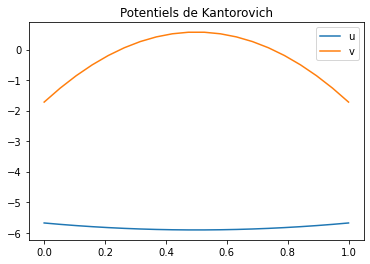

<Figure size 432x288 with 0 Axes>

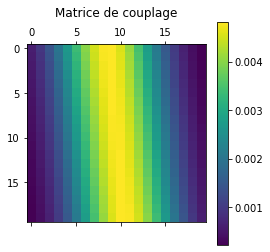

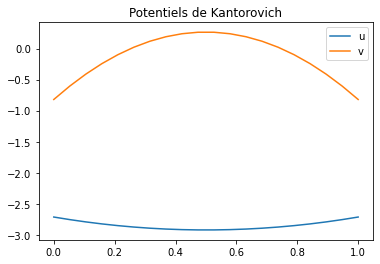

<Figure size 432x288 with 0 Axes>

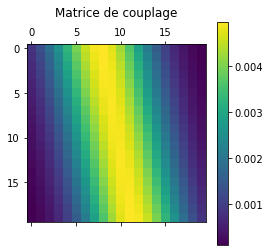

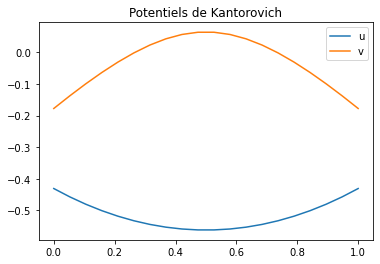

<Figure size 432x288 with 0 Axes>

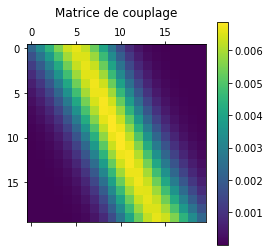

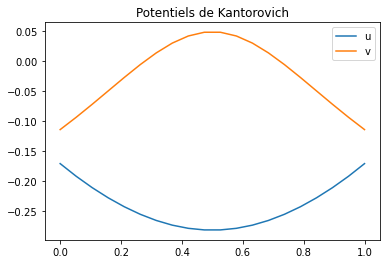

<Figure size 432x288 with 0 Axes>

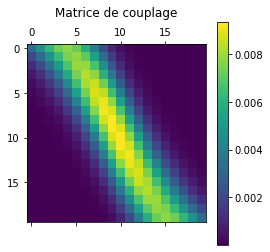

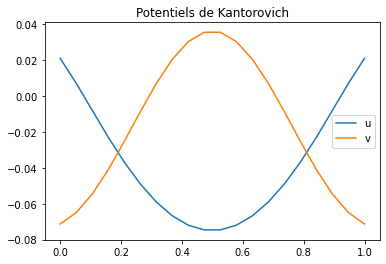

<Figure size 432x288 with 0 Axes>

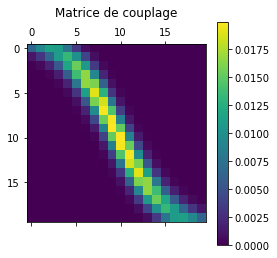

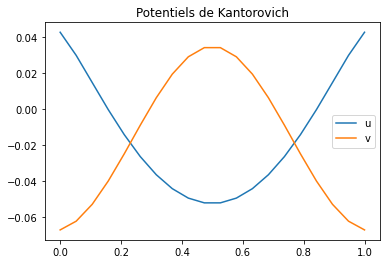

<Figure size 432x288 with 0 Axes>

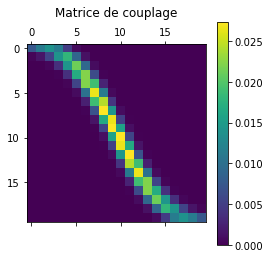

In [151]:
for epsilon in [1,0.5,0.1,0.05,0.01,0.005]:
    plt.figure()
    u, v, gamma_star = Sinkhorn(mu, nu, C, epsilon)
    plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
    plt.legend(["u","v"])
    plt.title("Potentiels de Kantorovich")
    plt.figure()
    plt.matshow(gamma_star)
    plt.colorbar()
    plt.title("Matrice de couplage", y = 1.12)

Comparons maintenant les potentiels de Kantorovich calculés par l'algorithme du simplex avec ceux calculés par l'algorithme de gradient avec $\epsilon$ petit ($\epsilon = 0.00013$, la valeur la plus petite de $\varepsilon$ pour laquelle l'algorithme fonctionne).

Text(0.5, 1.0, 'Potentiels de Kantorovich du problème entropique régularisé pour epsilon = 0.00013')

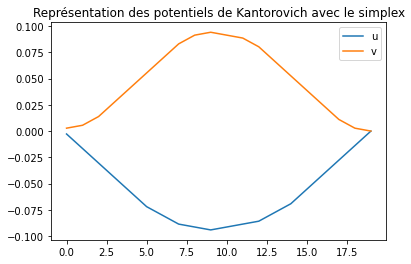

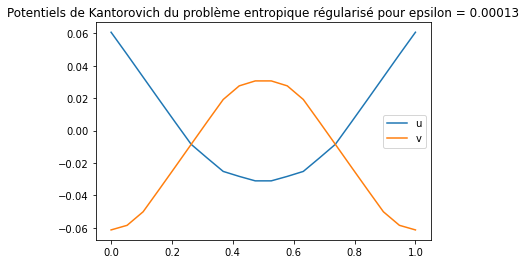

In [152]:
#potentiels de Kantorovich calculés avec l'algorithme de simplex
plt.figure()
y, s = solveOTdual(mu,nu,C)
u = y[0:N]
v = y[N:2*N]
plt.plot(u)
plt.plot(v)
plt.legend(['u','v'])
plt.title("Représentation des potentiels de Kantorovich avec le simplex")

#potentiels de Kantorovich calculés avec l'algorithme de gradient
epsilon = 0.00013
u, v, gamma_star = Sinkhorn(mu, nu, C, epsilon)
plt.figure()
plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
plt.legend(["u","v"])
plt.title("Potentiels de Kantorovich du problème entropique régularisé pour epsilon = {}".format(epsilon))

Comparons maintenant le couplage calculé par l'algorithme du simplex avec celui calculé par l'algorithme de gradient (toujours avec $\varepsilon = 0.00013$).

<ipython-input-100-99582525704a>:26: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  return linprog(c,b_eq = np.concatenate((mu,nu)),A_eq = A,method='simplex').x


Text(0.5, 1.12, 'Erreur entre les deux couplages')

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

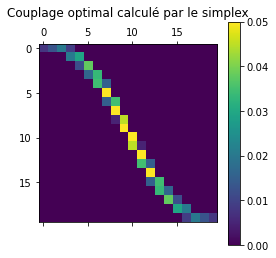

<Figure size 432x288 with 0 Axes>

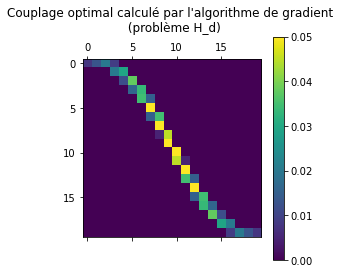

<Figure size 432x288 with 0 Axes>

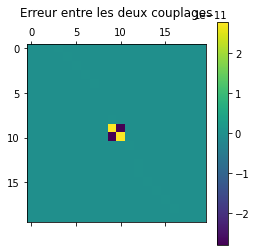

In [153]:
#couplage calculé avec l'algorithme de simplex
plt.figure()
gamma = solveOT(mu,nu,C)

#transformation de gamma (vecteur) en gamma (matrice)
gamma_m = np.zeros((N,N))

for i in range(0,N):
    gamma_m[i,:] = gamma[i*N:i*N+N]

#représentation de la matrice
plt.figure()
plt.matshow(gamma_m)
plt.colorbar()
plt.title('Couplage optimal calculé par le simplex', y = 1.12)

#couplage calculé avec l'algorithme de gradient
epsilon = 0.00013
u, v, gamma_star = Sinkhorn(mu, nu, C, epsilon)
plt.figure()
plt.matshow(gamma_star)
plt.colorbar()
plt.title("Couplage optimal calculé par l'algorithme de gradient \n (problème H_d)", y = 1.12)

plt.figure()
plt.matshow(gamma_m-gamma_star)
plt.colorbar()
plt.title("Erreur entre les deux couplages", y = 1.12)

On remarque la forme des potentiels de Kantorovich est similaire par rapport à celle des potentiels précédent. On reprend donc les mêmes vérifications sur leur "stratégie".

On vérifie que l'on observe la relation : $\mu_i > \nu_i \Longrightarrow v_i > u_i$ pour les potentiels de Kantorovich calculés par l'algorithme de gradient. Dans un premier graphiquement puis dans un second, on le fait à la main :

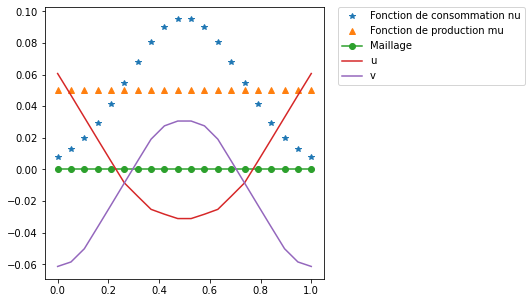

In [154]:
plt.figure(figsize=(5,5))
plt.plot(espace,nu,'*',label="Fonction de consommation nu")
plt.plot(espace,mu,'^',label="Fonction de production mu")
plt.plot(espace,np.zeros(N),'o-',label='Maillage')
plt.plot(espace,u,label="u")
plt.plot(espace,v,label="v")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

In [155]:
#les deux bolean doivent être égaux
for i in range(0,N):
    print(u[i] < v[i], " et ", mu[i] < nu[i])

False  et  False
False  et  False
False  et  False
False  et  False
False  et  False
False  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
True  et  True
False  et  True
False  et  False
False  et  False
False  et  False
False  et  False
False  et  False


On veut maintenant illustrer la convergence de

$$
\sup_{u, v} \left\{ \sum_{i} u_{i} \mu_{i}+\sum_{j} v_{j} \nu_{j}-\varepsilon \sum_{i j} \exp \left(\frac{u_{i}+v_{j}-C_{i j}}{\varepsilon}\right) \right\} ~~~~~~~~~~~~~ (\mathcal{H}_d)$$


vers 

$$\max \left\{ \sum_{i = 1}^{N} \mu_i u_i + \sum_{j = 1}^{N} \nu_j (\min_i C_{ij} - u_i) ~ | ~ \textbf{u} \in \mathbb{R}^N  \right\} ~~~~~~~~~~~~~ (\mathcal{MK}_d)$$

On va donc calculer les valeurs des fonctions-objectif de $(\mathcal{H}_d)$ en les potentiels de Kantorovich pour $\epsilon \in \{1,0.5,0.1,0.05,0.01,0.005,0.001,0.0003,0.0002,0.00013\}$ et observer la convergence de ces dernières :

In [156]:
print("epsilon :          ","Valeur de la fonction-objectif :")

for epsilon in [1,0.5,0.1,0.05,0.01,0.005,0.001,0.0003,0.0002,0.00013]:
    u, v, gamma_star = Sinkhorn(mu, nu, C, epsilon)
    print("{:<24.5f}".format(epsilon),"{}".format(-f_objectif_entropique_regularisee(u,v,epsilon)))

epsilon :           Valeur de la fonction-objectif :
1.00000                  -6.655086889298288
0.50000                  -3.2712211426735776
0.10000                  -0.5981854523323432
0.05000                  -0.27972367033538326
0.01000                  -0.04018694627187603
0.00500                  -0.013158945453314058
0.00100                  0.006629958447955109
0.00030                  0.009771569150269525
0.00020                  0.01021848659743794
0.00013                  0.0105313267877595


D'autre part, on remarque que le nombre d'itérations nécessaires dans l'algorithme de gradient diminue lorsque $\epsilon$ tend vers 0. On explique cela par le fait que l'algorithme de gradient se comporte mieux avec le gradient de la fonction-objectif de $(\mathcal{H}_d)$ lorsque $\epsilon$ tend vers 0. 

On compare les valeurs de la fonctions-objectif de $(\mathcal{MK}_d)$ avec les potentiels calculés par le simplex et ceux calculés par l'algorithme de gradient pour les problèmes $(\mathcal{MK}_\varepsilon)$ et $(\mathcal{H}_d)$ :

In [157]:
#potentiels de Kantorovich calculés avec l'algorithme de simplex
y, s = solveOTdual(mu,nu,C)
u1 = y[0:N]
v1 = y[N:2*N]

#potentiels de Kantorovich calculés avec l'algorithme de gradient (H_d)
epsilon = 0.0008
u2, v2, gamma_star = EntDual(mu, nu, C, epsilon)

#potentiels de Kantorovich calculés avec l'algorithme de Sinkhorn (H_d)
epsilon = 0.00013
u3, v3, gamma_star = Sinkhorn(mu, nu, C, epsilon)

print("Valeur de la fonction-objectif de (MK_d) en les potentiels de Kantorovich calculés par")
print("- le simplex : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1))))
print("\n- l'algorithme de gradient pour (H_d) : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))
print("Erreur : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1)))-np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))
print("\n- l'algorithme de Sinkhorn pour (H_d) : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u3,v3))))
print("Erreur : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1)))-np.dot(np.concatenate((mu,nu)),np.concatenate((u3,v3))))

#potentiels de Kantorovich calculés avec l'algorithme de gradient
epsilon = 0.0003
u2, v2 = GradDualReg(mu, nu, C, epsilon, epsilon)

print("\n- l'algorithme de gradient pour (MK_epsilon) : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))
print("Erreur : ",np.dot(np.concatenate((mu,nu)),np.concatenate((u1,v1)))-np.dot(np.concatenate((mu,nu)),np.concatenate((u2,v2))))

Valeur de la fonction-objectif de (MK_d) en les potentiels de Kantorovich calculés par
- le simplex :  0.011112315676793912

- l'algorithme de gradient pour (H_d) :  0.008333024634204668
Erreur :  0.0027792910425892443

- l'algorithme de Sinkhorn pour (H_d) :  0.010661326787759502
Erreur :  0.0004509888890344097

- l'algorithme de gradient pour (MK_epsilon) :  0.011053381018070867
Erreur :  5.893465872304493e-05


On voit que l'on a atteint notre objectif: la valeur de la fonction objectif sous l'algorithme de Sinkhorn est beaucoup plus proche de la fonction objectif atteinte avec le simplexe que la méthode de descente de gradient pour $(\mathcal{H}_d)$. L'erreur est plus petite aussi.

## 6 - Wasserstein flot pour le problème de matching

### 6.2 - Applications

#### 6.2.1 - Mise en application sur l'exemple défini dans la partie 3.3.1

Sinkhorn 2D: c'est exactement la même chose, il faut juste changer la matrice de coût $C$: 

In [176]:
def c_fun(x,y):
    return (1/2) * np.abs(x[0]-y[0])**2 + np.abs(x[1]-y[1])**2

Construction des données du problème

In [177]:
N = 20 # Nombre de points dans mu
M = 20 # Nombre de points dans nu
eps_test = 0.02 # jusqu'à 0.008, on a utilisé eps = 0.008 pour les grpahes du compte-rendu

#distribution nu
espace_x_nu = []
espace_y_nu = []
for i in range(0,M):
    espace_x_nu.append(np.random.randn())
    espace_y_nu.append(np.random.randn())
    
#distribution mu
espace_x_mu = []
espace_y_mu = []
for i in range(0,N):
    espace_x_mu.append(np.random.rand())
    espace_y_mu.append(np.random.rand())
    
# Poids associé à chaque point
mu = (1/N)*np.ones(N)
nu = (1/M)*np.ones(M)

#construction de la matrice C
C = np.ndarray((N,M))
for i in range(0,N):
    for j in range(0,M):
        C[i,j] = c_fun([espace_x_mu[i], espace_y_mu[i]],[espace_x_nu[j], espace_y_nu[j]])

Représentation des distributions $\mu$ et $\nu$ :

Text(0.5, 1.0, 'Distribution initiale des points pour M = 20 et N = 20')

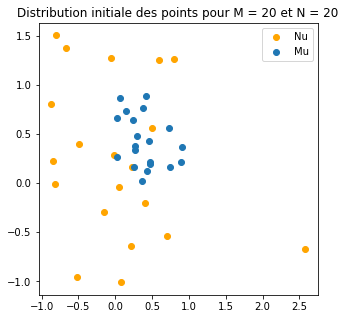

In [178]:
# TEST - POINTS
plt.figure(figsize=(5,5))
plt.scatter(espace_x_nu, espace_y_nu, c='orange', label='Nu')
plt.scatter(espace_x_mu, espace_y_mu, label='Mu')
plt.legend()
plt.title('Distribution initiale des points pour M = ' + str(M) + ' et N = ' + str(N))

On résout le problème avec l'algorithme de Sinkhorn :

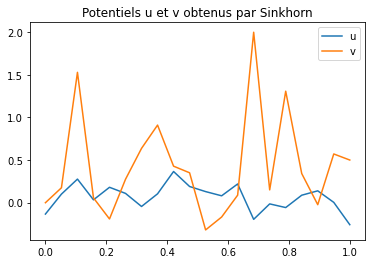

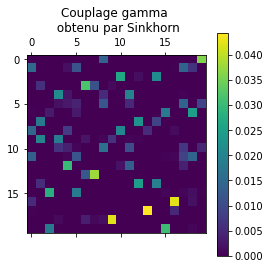

In [179]:
u, v, gamma_star = Sinkhorn(mu, nu, C, eps_test) 
plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, N), v)
plt.legend(["u","v"])
plt.title('Potentiels u et v obtenus par Sinkhorn')
plt.matshow(gamma_star)
plt.title('Couplage gamma \n obtenu par Sinkhorn')
plt.colorbar()

Comparons ce résultat avec le résultat de la partie 3.3.2 (résolution du primal avec le simplex) :

In [180]:
gamma = solveOT(mu,nu,C)

<ipython-input-100-99582525704a>:26: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.
  return linprog(c,b_eq = np.concatenate((mu,nu)),A_eq = A,method='simplex').x


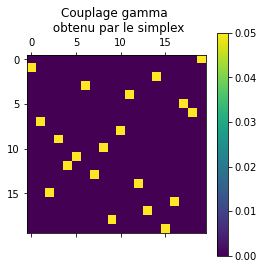

In [181]:
#transformation de gamma (vecteur) en gamma (matrice)
gamma_m = np.zeros((N,N))

for i in range(0,N):
    gamma_m[i,:] = gamma[i*N:i*N+N]

#représentation de la matrice gamma_m
plt.matshow(gamma_m)
plt.title("Couplage gamma \n obtenu par le simplex")
plt.colorbar()

Implémentation de la fonction grad_en qui renvoie le gradient associé à la distance de Wasserstein :

In [182]:
def grad_en(z): # z = [espace_x_mu, espace_y_mu]
    grad = np.zeros(2*N)# chaque composante correspond à x ou y d'un point de mu
    y_bar_x = np.zeros(N)
    y_bar_y = np.zeros(N)
    
    espace_x_z = z[0:N]
    espace_y_z = z[N:2*N]
    # Mise-à-jour de la matrice C
    C_grad = np.ndarray((N,M))
    for i in range(0,N):
        for j in range(0,M):
            C_grad[i,j] = c_fun([z[0:N][i], z[N:2*N][i]],[espace_x_nu[j], espace_y_nu[j]])
    
    u, v, gamma_star = Sinkhorn(mu, nu, C_grad, eps_test)
       
    for i in range(N):
        y_bar_x[i] = (1/mu[i]) * np.dot(gamma_star, espace_x_nu)[i]
        y_bar_y[i] = (1/mu[i]) * np.dot(gamma_star, espace_y_nu)[i]
        grad[i] = z[i] -  y_bar_x[i] # x
        grad[i + N] = z[i + N] - y_bar_y[i] # y

    return grad

On représente le champ de gradient initial :

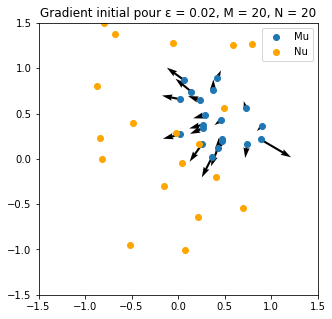

In [183]:
# Trace du champ gradient
plt.figure(figsize=(5,5))
grad_test = grad_en(np.append(espace_x_mu, espace_y_mu))
plt.quiver(espace_x_mu, espace_y_mu, -grad_test[0:N], -grad_test[N:2*N])
plt.scatter(espace_x_mu, espace_y_mu, label='Mu')
plt.scatter(espace_x_nu, espace_y_nu, color='orange', label='Nu')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('Gradient initial pour ε = ' + str(eps_test) + ', M = ' + str(M) + ', N = ' + str(N))
plt.legend()

#### 6.2.2 - Mise en application sur un exemple en 2D

Création des données du problème

In [184]:
N = 100 # Nombre de points dans mu
M = 100 # Nombre de points dans nu
eps_test = 0.01 # jusqu'à 0.008

#distribution nu
espace_x_nu = []
espace_y_nu = []
for i in range(0,M):
    r = 0.8 + 0.2 * np.random.rand()
    theta = np.random.uniform(0, 2* np.pi)
    espace_x_nu.append(r*np.cos(theta))
    espace_y_nu.append(r*np.sin(theta))
    
#distribution mu
espace_x_mu = []
espace_y_mu = []
for i in range(0,N):
    espace_x_mu.append(np.random.rand() - 0.5)
    espace_y_mu.append(np.random.rand() - 0.5)
    
# Poids associé à chaque point
mu = (1/N)*np.ones(N)
nu = (1/M)*np.ones(M)

#construction de la matrice C
C = np.ndarray((N,M))
for i in range(0,N):
    for j in range(0,M):
        C[i,j] = c_fun([espace_x_mu[i], espace_y_mu[i]],[espace_x_nu[j], espace_y_nu[j]])

Représentation des données du problème :

Text(0.5, 1.0, 'Distribution initiale des points pour M = 100 et N = 100')

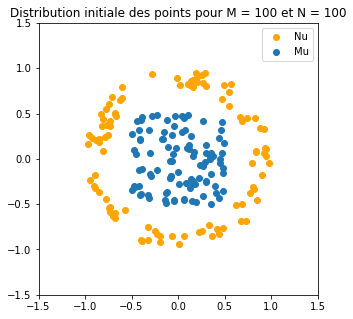

In [185]:
# TEST - POINTS
plt.figure(figsize=(5,5))
plt.scatter(espace_x_nu, espace_y_nu, c='orange', label='Nu')
plt.scatter(espace_x_mu, espace_y_mu, label='Mu')
plt.legend()
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('Distribution initiale des points pour M = ' + str(M) + ' et N = ' + str(N))

On résout le problème avec Sinkhorn :

Text(0.5, 1.0, 'Couplage gamma')

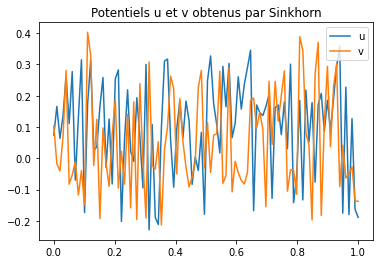

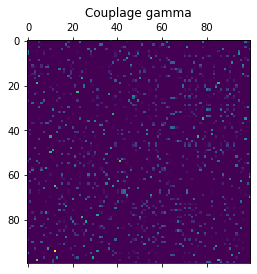

In [186]:
u, v, gamma_star = Sinkhorn(mu, nu, C, eps_test)
plt.plot(np.linspace(0, 1, N),u,np.linspace(0, 1, M), v)
plt.legend(["u","v"])
plt.title('Potentiels u et v obtenus par Sinkhorn')
plt.matshow(gamma_star)
plt.title('Couplage gamma')

Représentation du champ de gradient initial :

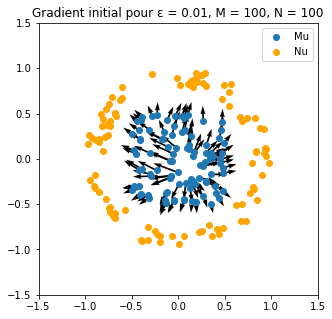

In [187]:
# Trace du champ gradient
plt.figure(figsize=(5,5))
grad_test = grad_en(np.append(espace_x_mu, espace_y_mu))
plt.quiver(espace_x_mu, espace_y_mu, -grad_test[0:N], -grad_test[N:2*N])
plt.scatter(espace_x_mu, espace_y_mu, label='Mu')
plt.scatter(espace_x_nu, espace_y_nu, color='orange', label='Nu')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('Gradient initial pour ε = ' + str(eps_test) + ', M = ' + str(M) + ', N = ' + str(N))
plt.legend()

Implémentation de la fonction GradWas qui réalise la descente de gradient associé à la distance de Wasserstein, avec représentation toutes les 5 itérations 

In [188]:
def GradWas(dist_mu, dist_nu, tau, iter_max):
    # Attention: dist_mu =/= mu
    # mu c'est juste les poids, dist_mu est la distribution dans l'espace + poids
    
    plt.figure(figsize=(5,5))
    
    z = dist_mu # [x_mu, y_mu]
    nb_iter = 0
    
    plt.scatter(espace_x_nu, espace_y_nu, color='orange', label = "Nu")
    
    while nb_iter <= iter_max:
        
        if nb_iter % 5 == 0:
            plt.scatter(z[0:N], z[N:2*N], color=np.random.rand(3,), label = "n = " + str(nb_iter))
        
        grad = grad_en(z)
        z = z - tau * grad
        nb_iter += 1
        
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.legend()
    plt.title('Évolution pour ε = ' + str(eps_test) + ', M = ' + str(M) + ', N = ' + str(N))
    plt.show()    
        
    return z

Mise en application :

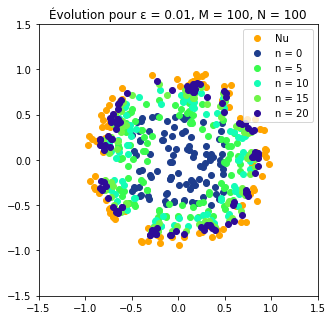

In [189]:
grad_final = GradWas(np.append(espace_x_mu, espace_y_mu), np.append(espace_x_mu, espace_y_mu) , 0.1, 20)

### 6.3 - Divergence de Sinkhorn

#### 6.3.2 - Utilisation de la divergence de Sinkhorn dans l'exemple de la partie 6.2.2

Implémentation de la fonction grad_en_sinkhorn qui renvoie le gradient associé à la divergence de Sinkhorn :

In [190]:
def grad_en_sinkhorn(z): # z = [espace_x_mu, espace_y_mu]
    grad = np.zeros(2*N)# chaque composante correspond à x ou y d'un point de mu
    y_bar_x = np.zeros(N)
    y_bar_y = np.zeros(N)
    
    # Mise-à-jour de la matrice C
    C_mu_nu = np.ndarray((N,M))
    for i in range(0,N):
        for j in range(0,M):
            C_mu_nu[i,j] = c_fun([z[0:N][i], z[N:2*N][i]],[espace_x_nu[j], espace_y_nu[j]])
    
    C_mu_mu = np.ndarray((N,N))
    for i in range(0,N):
        for j in range(0,N):
            C_mu_mu[i,j] = c_fun([z[0:N][i], z[N:2*N][i]],[z[0:N][j], z[N:2*N][j]])
    
    u, v, gamma_star_mu_nu = Sinkhorn(mu, nu, C_mu_nu, eps_test)
    u, v, gamma_star_mu_mu = Sinkhorn(mu, mu, C_mu_mu, eps_test)
    
    # Calcul des grad des coûts:
    
    for i in range(N):     
        grad[i] = z[0:N][i] * mu[i] - np.dot(gamma_star_mu_nu, espace_x_nu)[i] - (1/2) * (z[0:N][i] * mu[i] - np.dot(gamma_star_mu_mu, z[0:N])[i])
        grad[i + N] = z[N:2*N][i] * mu[i] - (np.dot(gamma_star_mu_nu, espace_y_nu)[i] - (1/2) * (z[N:2*N][i] * mu[i] - np.dot(gamma_star_mu_mu, z[N:2*N])[i]))


    return grad

On trace le champ de gradient initial :

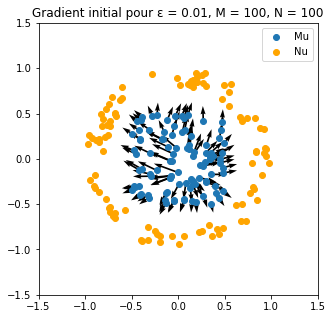

In [191]:
# Trace du champ gradient
plt.figure(figsize=(5,5))
grad_test = grad_en_sinkhorn(np.append(espace_x_mu, espace_y_mu))
plt.quiver(espace_x_mu, espace_y_mu, -grad_test[0:N], -grad_test[N:2*N])
plt.scatter(espace_x_mu, espace_y_mu, label = 'Mu')
plt.scatter(espace_x_nu, espace_y_nu, color='orange', label='Nu')
plt.xlim([-1.5,1.5])
plt.ylim([-1.5,1.5])
plt.title('Gradient initial pour ε = ' + str(eps_test) + ', M = ' + str(M) + ', N = ' + str(N))
plt.legend()

Implémentation de la fonction GradWasSinkhorn qui réalise la descente de gradient associé à la divergence de Sinkhorn, avec représentation toutes les 5 itérations 

In [192]:
def GradWasSinkhorn(dist_mu, dist_nu, tau, iter_max):
    # Attention: dist_mu =/= mu
    # mu c'est juste les poids, dist_mu est la distribution dans l'espace + poids
    
    plt.figure(figsize=(5,5))
    
    z = dist_mu # [x_mu, y_mu]
    nb_iter = 0
    
    plt.scatter(espace_x_nu, espace_y_nu, color='orange', label = "Nu")
    
    while nb_iter <= iter_max:
        
        if nb_iter % 5 == 0:
            plt.scatter(z[0:N], z[N:2*N], color=np.random.rand(3,), label = "n = " + str(nb_iter))
            
        grad = grad_en_sinkhorn(z)
        z = z - tau * grad
        nb_iter += 1
        
    plt.xlim([-1.5,1.5])
    plt.ylim([-1.5,1.5])
    plt.legend()
    plt.title('Évolution (Divergence Sinkhorn) pour ε =' + str(eps_test) + ', M = ' + str(M) + ', N = ' + str(N))
    plt.show()    
        
    return z

Mise en application :

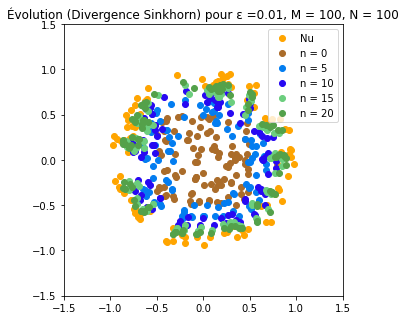

In [193]:
grad_final = GradWasSinkhorn(np.append(espace_x_mu, espace_y_mu), np.append(espace_x_nu, espace_y_nu) , 10, 20)